First rows of dataset:
     City  Day  Temperature  Humidity  Rainfall
0  Tehran    1           17        77        43
1  Tehran    2           35        29        45
2  Tehran    3           32        50        11
3  Tehran    4           26        62        45
4  Tehran    5           26        50         5 

Average temperature, humidity, rainfall per city:
         Temperature   Humidity   Rainfall
City                                      
Ahvaz      27.666667  52.933333  24.300000
Isfahan    28.166667  47.000000  25.833333
Mashhad    27.700000  49.433333  22.133333
Shiraz     27.400000  48.000000  25.766667
Tabriz     27.566667  47.500000  26.200000
Tehran     28.800000  50.866667  23.666667 

Hottest city: Tehran
Coldest city: Shiraz 

Rainy days (>10 mm) per city:
City
Ahvaz      20
Isfahan    23
Mashhad    21
Shiraz     28
Tabriz     21
Tehran     22
dtype: int64 



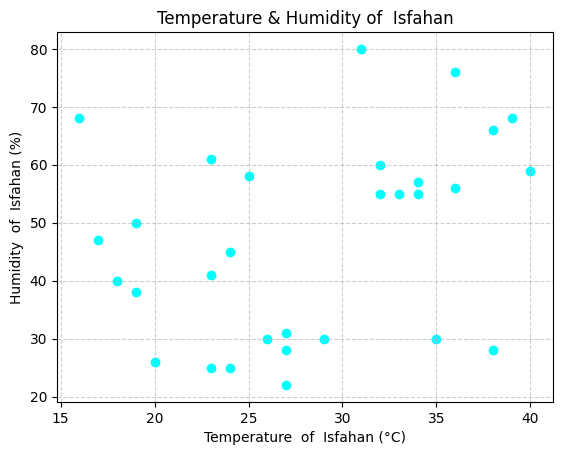

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------
# Part 1: Random data
# ------------------------------

rng = np.random.default_rng(42)

cities = ["Tehran", "Mashhad", "Isfahan", "Tabriz", "Shiraz", "Ahvaz"]
days = np.arange(1, 31)

# Create repeated city names for 30 days each
city = np.repeat(cities, 30)
day = np.tile(days, 6)

# Generate random weather data
temperature = rng.integers(15, 41, size=180)   
humidity = rng.integers(20, 81, size=180)     
rainfall = rng.integers(0, 51, size=180)       

# ------------------------------
# Part 2: Create DataFrame
# ------------------------------

df = pd.DataFrame({
    "City": city,
    "Day": day,
    "Temperature": temperature,
    "Humidity": humidity,
    "Rainfall": rainfall
})

print("First rows of dataset:")
print(df.head(), "\n")

# ------------------------------
# Part 3: Statistical Analysis
# ------------------------------

# Average values per city
avg_stats = df.groupby("City")[["Temperature", "Humidity", "Rainfall"]].mean()
print("Average temperature, humidity, rainfall per city:")
print(avg_stats, "\n")

# Hottest & coldest
hottest_city = avg_stats["Temperature"].idxmax()
coldest_city = avg_stats["Temperature"].idxmin()
print("Hottest city:", hottest_city)
print("Coldest city:", coldest_city, "\n")

#  Rainfall more than 10 mm 
rainy_days = df[df["Rainfall"] > 10]
rainy_count = rainy_days.groupby("City").size()
print("Rainy days (>10 mm) per city:")
print(rainy_count, "\n")

# ------------------------------
# Part 4: Scatter Plot for Isfahan
# ------------------------------

isfahan_df = df[df["City"] == "Isfahan"]

plt.scatter(isfahan_df["Temperature"], isfahan_df["Humidity"],c="cyan")
plt.xlabel("Temperature  of  Isfahan (°C)")
plt.ylabel("Humidity  of  Isfahan (%)")
plt.title("Temperature & Humidity of  Isfahan")
plt.grid(True, linestyle= '--',alpha=0.6)
plt.show()


Missing values after filling:
Pregnancies         0
Glucose             0
BloodPressure       0
SkinThickness       0
Insulin             0
BMI                 0
DiabetesPedigree    0
Age                 0
Outcome             0
dtype: int64 

First 5 rows of cleaned data:
   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0       35.00000  155.548223  33.6   
1            1     85.0           66.0       29.00000  155.548223  26.6   
2            8    183.0           64.0       29.15342  155.548223  23.3   
3            1     89.0           66.0       23.00000   94.000000  28.1   
4            0    137.0           40.0       35.00000  168.000000  43.1   

   DiabetesPedigree  Age  Outcome  
0             0.627   50        1  
1             0.351   31        0  
2             0.672   32        1  
3             0.167   21        0  
4             2.288   33        1   

Correlation Matrix:
                Glucose  BloodPressure

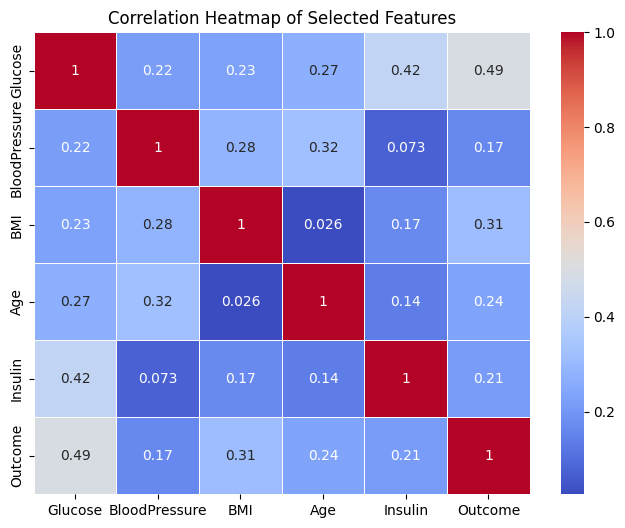


Feature with highest correlation: Glucose
Correlation value: 0.49292766761250945


In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# Part 1: Data Cleaning
# -----------------------------


df = pd.read_csv("diabetes.csv")

# 1. Fill missing values with column mean
df_filled = df.fillna(df.mean(numeric_only=True))

# 2. Check if any missing values remain
print("Missing values after filling:")
print(df_filled.isnull().sum(), "\n")

# 3. Show first 5 rows of cleaned data
print("First 5 rows of cleaned data:")
print(df_filled.head(), "\n")

# -----------------------------
# Part 2: Heatmap
# -----------------------------

# Select important columns
cols = ["Glucose", "BloodPressure", "BMI", "Age", "Insulin", "Outcome"]
df_selected = df_filled[cols]

# Correlation matrix
corr_matrix = df_selected.corr()
print("Correlation Matrix:")
print(corr_matrix, "\n")

# Draw heatmap 
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix, 
    annot=True,         
    cmap="coolwarm", 
    linewidths=0.5
)
plt.title("Correlation Heatmap of Selected Features")
plt.show()

# -----------------------------
# Part 3: strongest correlation
# -----------------------------

outcome_corr = corr_matrix["Outcome"].drop("Outcome")  
max_feature = outcome_corr.idxmax()                 
max_value = outcome_corr.max()                         

print("\nFeature with highest correlation:", max_feature)
print("Correlation value:", max_value)
